<a href="https://colab.research.google.com/github/chuancao26/islp/blob/main/resamplng_methods_exercices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Conceptual

## 2

a. La probabilidad de ser elegido en un muestra de tamano n y con reemplazo es de 1/n para todos los casos. Por lo que la probabilidad de no ser la jth sera de:

$$1-\frac{1}{n}$$

b. Tenemos que de la misma forma la probabilidad de que la segunda observacion del bootstrap sea la jth observacion de nuestra muestra sera de:
$$1-\frac{1}{n}$$

c. La probabilidad de que una observacion j no este en el bootstrap
$$1-\frac{1}{n}$$
Y de que toda la muestra sea no este sera de:
$$(1-\frac{1}{n})\times(1-\frac{1}{n}) ... n\ veces$$

si la bootstrap esta compuesta unicamente de de esa observacion tenemos que multiplicar sus ocurrencias ya que son eventos independientes. ya que son con reemplazo. cada muestreo no altera el estado de las cosas.


d. En el caso que $n=5$ la probabilidad de que el jth observacion de la muestre este en el bootstrap smaple sera de:
$$1 - (1-\frac{1}{n})$$

In [ ]:
def is_not_bootstrap(n):
  return (1-1/n) ** n

In [ ]:
1 - is_not_bootstrap(5)

0.632120577028895

e. $n =100$

In [ ]:
1 - is_not_bootstrap(100)

0.6339676587267709

f. $h=10000$

In [ ]:
1 - is_not_bootstrap(10000)

0.6321389535670295

la probabilidad de que el elemento jth este en la bootstrap sample es del 63%

g. calculando con diferentes valores de n y graficnado

<Axes: >

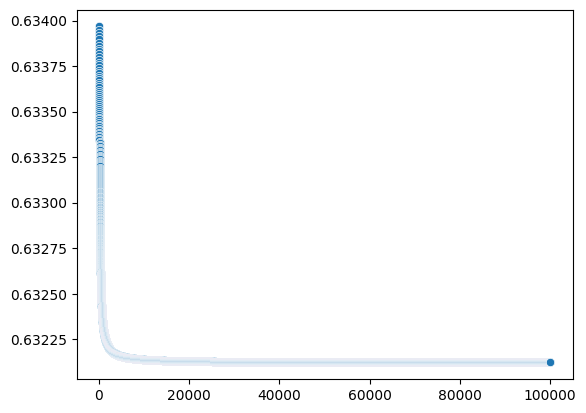

In [ ]:
n = np.arange(100, 100000)
f_n = 1 - is_not_bootstrap(n)
sns.scatterplot(x=n, y=f_n)

In [ ]:
1/100

0.01

## 3

a

Cross Validated esta implementado mediante el uso de k grupos. y el primer grupo es tratado como el de validacion hasta llegar al k - 1

b

La ventaja para el caso del set de validacion es que la cantidad de veces que se correra un modelo sera menor a n. En este caso k., sin embargo esto tambien trae un deventaja debido a que con el modo de LOOCV, tenemos que los estimados o valores reales de los errores seran insesgados mientras que con k no pasaria. Llevandonos a un problema de bias.

'Por otro lado tenemos que el Kfold tiene uhn ventaja en la autocorrelacion debido a que los grupos seran diferenciados y noi se relacioaran mucho lo que significa que tednran menor varianza que los LOOCV.
